# Pengenalan Pytorch untuk Klasifikasi
Modul pengenalan PyTorch untuk klasifikasi bunga Iris merupakan langkah awal yang penting bagi mereka yang ingin memahami dasar-dasar pengembangan model machine learning menggunakan PyTorch. Pentingnya modul pengenalan PyTorch untuk klasifikasi bunga Iris menjadi semakin terasa karena langkah ini memberikan fondasi yang kokoh bagi individu yang ingin mengeksplorasi dan memahami konsep dasar dalam pengembangan model machine learning dengan menggunakan PyTorch. 

Dalam konteks ini, PyTorch bukan hanya menjadi alat pengembangan yang populer tetapi juga muncul sebagai framework yang sangat fleksibel dan kuat dalam mengimplementasikan model neural network. Melalui modul ini, para pembelajar dapat mengeksplorasi struktur dasar pengembangan model, mulai dari impor library dan pre-processing data hingga pembuatan, pelatihan, dan evaluasi model. Pemahaman terhadap klasifikasi bunga Iris sebagai studi kasus memberikan kejelasan mengenai bagaimana menerapkan konsep-konsep ini pada kasus nyata, sementara penggunaan PyTorch mempermudah proses implementasi dengan menyediakan alat yang intuitif dan dokumentasi yang baik. Dengan menguasai langkah-langkah dasar ini, para pengembang dan peneliti dapat memperoleh landasan yang kuat untuk kemudian menjelajahi dan mengembangkan model machine learning yang lebih kompleks dan spesifik. Kesempatan untuk mendalam ke dalam PyTorch memberikan pemahaman yang mendalam tentang prinsip-prinsip fundamental dalam machine learning, membantu para pembelajar meraih kepercayaan diri yang diperlukan dalam memecahkan tantangan di bidang ini.


Berikut adalah penjelasan singkat tentang bagaimana modul tersebut dapat dibuat:

#  Pendahuluan

## Import Library

Pertama-tama, langkah awal dalam pengembangan modul PyTorch adalah dengan mengimpor berbagai library esensial seperti PyTorch dan NumPy. Ini melibatkan pilihan library yang strategis untuk memfasilitasi manipulasi dan analisis data yang efektif. Dengan mengintegrasikan PyTorch dan NumPy, pengembang dapat memanfaatkan fitur-fitur kaya yang ditawarkan oleh kedua library tersebut, membentuk dasar yang kuat untuk pengolahan data selanjutnya dalam konteks pengembangan model machine learning.

In [17]:
import torch
from torch import nn

from torchvision.transforms import ToTensor

import pandas as pd
import numpy as np


## Load dataset

Setelah memuat dataset Iris, langkah selanjutnya melibatkan proses pre-processing yang mencakup normalisasi data untuk memastikan konsistensi dan keberlanjutan dalam analisis. Selanjutnya, dataset perlu dibagi menjadi dua bagian utama, yaitu data latih dan data uji, untuk memungkinkan pengembangan model yang memadai dan evaluasi yang akurat terhadap kinerja model tersebut. Dengan melakukan pre-processing ini, kita menciptakan fondasi yang solid untuk melatih model machine learning dengan menggunakan dataset Iris, memastikan bahwa data telah diatur dengan baik untuk mendukung pengambilan keputusan yang optimal.

In [18]:
df = pd.read_csv('dataset/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Membuang atribut yang tidak perlu
Di dataset Iris terdapat kolom yang tidak diperlukan, yaitu kolom Id. Kolom ini tidak mempengaruhi apapun terhadap output. Sehingga, kolom Id ini kita buang dengan cara:

In [19]:
df.drop(['Id'],axis=1,inplace=True)

# Memetakan Variabel Dependen dan Independen

Dari dataset Iris, kita pisahkan mana variabel bebas (independen) dan terikat (dependen). Variabel bebas adalah variabel yang nilainya berdiri sendiri dan tidak dipengaruhi oleh variabel lain. Pada kasus klasifikasi jenis bunga Iris, variabel bebasnya adalah SepalLength, SepalWidth, PetalLength, dan PelalWidth. Sedangkan variabel dependen adalah variabel yang nilainya dipengaruhi oleh variabel lain. Dikarenakan jenis-jenis bunga Iris ditentukan oleh ukurang Sepal dan Petal, maka variabel dependennya adalah kolom Species. Kita bisa memetakan semua variabel independen dengan:
```python
X = df.drop(["Species"],axis=1).values
```

sedangkan variabel dependen bisa dipetakan dengan cara:
```python
y = df['Species'].values
```

In [20]:
X = df.drop(["Species"],axis=1).values
y = df['Species'].values

Notasi $X$ di sini menggunakan notasi $X$ besar karena variabel $X$ mencerminkan bentuk sebuah matriks yang terdiri atas sekian baris dan sekian kolom. Sedangkan variabel $y$ direpresentasikan dengan variabel $y$ kecil karena hanya mencerminkan sebagai sebuah vektor (matriks 1 dimensi). Ukuran $X$ adalah $n x 4$ di mana $n$ adalah jumlah total data sedangkan $4$ adalah jumlah total variabel independen. Untuk mengetahui ukuran asli dari kedua variabel, kita bisa menampilkannya dengan perintah
```python
print(X.shape, y.shape)
```

In [21]:
print(X.shape, y.shape)

(150, 4) (150,)


# Label Encoding

Label Encoding (LE) merupakan proses yang sangat penting. LE berfungsi mengubah bentuk data terutama kategorical menjadi bentuk label integer. Sebagai contoh, nilai dari kolom Species berisi dengan tulisan $Iris-setosa,Iris-versicolor,Iris-virginica$. Ketiga kelas ini bisa dipetakan menjadi $Iris-setosa = 0, Iris-versicolor=1, Iris-virginica=2$. Berikut adalah contoh kode untuk label encoding:
```python
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)
```

In [22]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Data Scaling dan Data Preparation

Load dataset Iris dan lakukan pre-processing seperti normalisasi data dan pembagian dataset menjadi data latih dan data uji.

## Data Splitting

In [23]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

## Data Scaling

In [24]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

# Pembuatan Model

Tentukan arsitektur model neural network yang akan digunakan. Dalam kasus ini, kita dapat menggunakan model sederhana dengan beberapa layer linear (fully connected) dan fungsi aktivasi. Di sini, kita membuat sebuah arsitektur neural network dengan 3 layer, layer input, layer hidden, dan layer output.

Layer input memiliki input dengan ukuran 4 dikarenakan ada 4 fitur (variabel independen) yang digunakan dengan output yang bisa kita tentukan sendiri ukurannya. Di sini, output dari layer input kita beri nilai 128, yang artinya terdapat 128 node pada layer ini. Sedangkan inputan pada layer hidden adalah output dari layer input, yaitu 128 dengan output 64 node. Pada layer output, inputnya adalah 64 node dengan output 3 node. 3 node ini adalah 3 jenis bunga yang diklasifikasikan. Pada tiap node, diaktivasi dengan fungsi aktivasi Rectified Linear Unit (ReLU).

Secara umum, struktur class dari framework pytorch terdiri atas dua fungsi, yaitu fungsi ``` __init__()``` dan fungsi ```forward()```. Fungsi ```__init__()``` adalah constructor yang pertama kali dieksekusi oleh program. Di dalam fungsi ini biasanya hanya berisi tahap inisialisasi. Sedangkan fungsi ```forward()``` adalah fungsi yang akan dieksekusi setiap kali model dipanggil. Di fungsi ini, proses feedforward dari neural network terjadi.

In [26]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(NeuralNetwork, self).__init__()
        self.input_layer = nn.Linear(input_dim, 128)
        self.hidden_layer = nn.Linear(128,64)
        self.output_layer = nn.Linear(64, num_classes)
        self.relu = nn.ReLU()
    
    def forward(self, x):
        x = self.relu(self.input_layer(x))
        x = self.relu(self.hidden_layer(x))
        x = self.relu(self.output_layer(x))
        return x
        

# Inisialisasi Model dan Optimizer
Inisialisasikan model yang telah dibuat beserta optimizer yang akan digunakan untuk melatih model, misalnya, menggunakan stochastic gradient descent (SGD).

In [27]:
input_dim = 4
num_classes = 3

model = NeuralNetwork(input_dim=input_dim, num_classes=num_classes)
learning_rate = 0.1
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# Pelatihan Model

Lakukan iterasi melalui data latih untuk melatih model. Hitung loss, lakukan backpropagation, dan optimalkan parameter model.

In [28]:
num_epochs = 1500

train_losses = []
test_losses = []
for epoch in range(num_epochs):
    optimizer.zero_grad()
    
    # tahapan feedforward
    output = model(X_train)
    train_loss = criterion(output, y_train)
    
    # tahapan backpropagation
    train_loss.backward()
    optimizer.step()
    
    # mengevaluasi model hasil training pada data testing
    output_tes = model(X_test)
    test_loss = criterion(output_tes, y_test)
    
    # menampung semua output loss 
    train_losses.append(train_loss.item())
    test_losses.append(test_loss.item())

    if (epoch + 1) % 100 == 0:
        print(f"Epoch {epoch+1}/{num_epochs}, Train Loss: {train_loss.item():.4f}, Test Loss: {test_loss.item():.4f}")

Epoch 100/1500, Train Loss: 0.1332, Test Loss: 0.0945
Epoch 200/1500, Train Loss: 0.0693, Test Loss: 0.0452
Epoch 300/1500, Train Loss: 0.0550, Test Loss: 0.0344
Epoch 400/1500, Train Loss: 0.0477, Test Loss: 0.0295
Epoch 500/1500, Train Loss: 0.0426, Test Loss: 0.0264
Epoch 600/1500, Train Loss: 0.0390, Test Loss: 0.0245
Epoch 700/1500, Train Loss: 0.0360, Test Loss: 0.0232
Epoch 800/1500, Train Loss: 0.0334, Test Loss: 0.0222
Epoch 900/1500, Train Loss: 0.0310, Test Loss: 0.0215
Epoch 1000/1500, Train Loss: 0.0286, Test Loss: 0.0209
Epoch 1100/1500, Train Loss: 0.0262, Test Loss: 0.0202
Epoch 1200/1500, Train Loss: 0.0239, Test Loss: 0.0195
Epoch 1300/1500, Train Loss: 0.0216, Test Loss: 0.0188
Epoch 1400/1500, Train Loss: 0.0196, Test Loss: 0.0182
Epoch 1500/1500, Train Loss: 0.0177, Test Loss: 0.0177


# Visualisasi Output
Hasil output berupa loss disajikan dalam bentuk grafik untuk melihat apakah model sudah konvergen apa belum. 

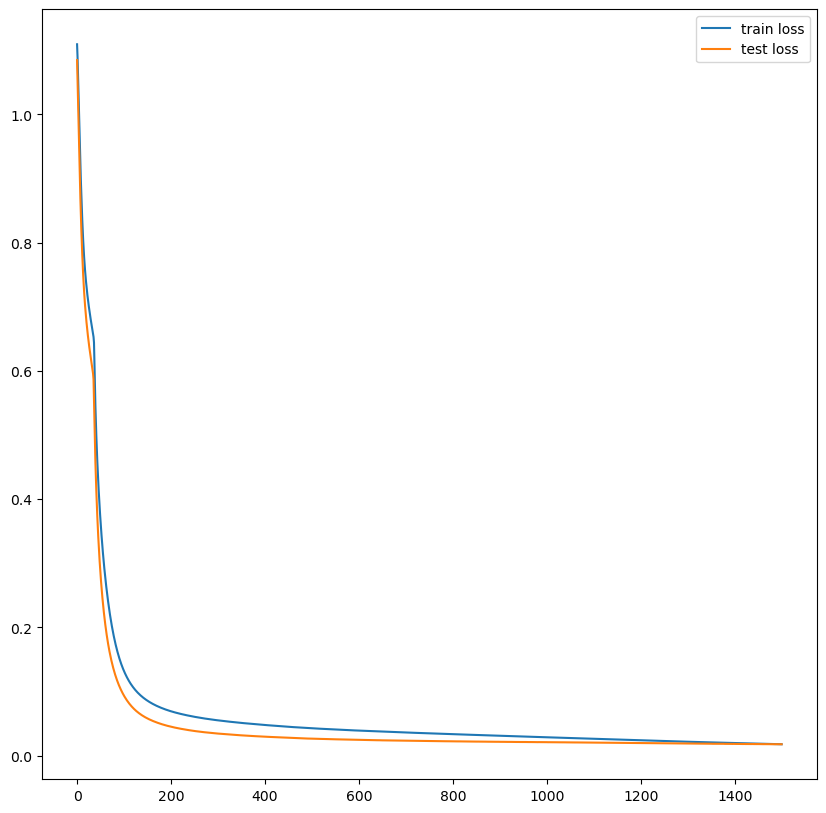

In [29]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.plot(train_losses, label='train loss')
plt.plot(test_losses, label='test loss')
plt.legend()
plt.show()

# Evaluasi Model
Setelah melalui proses pelatihan yang cermat, langkah berikutnya adalah mengimplementasikan model untuk melakukan prediksi pada data uji, menguji kemampuannya dalam menggeneralisasi informasi yang telah dipelajari selama pelatihan. Evaluasi performa model kemudian dilakukan dengan membandingkan hasil prediksi dengan nilai sebenarnya dalam data uji, memungkinkan penilaian objektif terhadap sejauh mana model dapat memahami dan merespons pada pola yang ada dalam dataset yang tidak pernah dilihat sebelumnya. Proses evaluasi ini penting untuk memvalidasi kehandalan model dan memberikan wawasan kritis bagi pengembang atau peneliti untuk meningkatkan performa dan generalisasi model ke situasi dunia nyata.

In [30]:
predict_out = model(X_test)
_, y_pred = torch.max(predict_out, 1)

In [31]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print('prediction accuracy', accuracy_score(y_test.data, y_pred.data))

print( 'macro precision', precision_score(y_test.data, y_pred.data, average='macro'))
print('micro precision', precision_score(y_test.data, y_pred.data, average='micro'))
print('macro recall', recall_score(y_test.data, y_pred.data, average='macro'))
print('micro recall', recall_score(y_test.data, y_pred.data, average='micro'))

prediction accuracy 1.0
macro precision 1.0
micro precision 1.0
macro recall 1.0
micro recall 1.0


# Confusion Matrix
Confusion Matrix adalah tabel yang digunakan dalam bidang pembelajaran mesin dan klasifikasi untuk mengevaluasi kinerja model. Dalam konteks klasifikasi bunga Iris, yang melibatkan prediksi spesies bunga iris berdasarkan fitur-fitur tertentu, matriks kebingungan memberikan gambaran umum yang komprehensif tentang prediksi model dibandingkan dengan label kelas yang sebenarnya.

Mari kita uraikan komponen-komponen utama dari matriks kebingungan untuk klasifikasi bunga Iris:

1. True Positif (TP): Ini menunjukkan jumlah contoh di mana model memprediksi kelas positif dengan benar (mengidentifikasi spesies iris dengan benar).

1. True Negative (TN): Jumlah contoh di mana model memprediksi kelas negatif dengan benar (contoh yang diidentifikasi dengan benar yang tidak termasuk dalam spesies iris yang diprediksi).

1. False Positive (FP): Ini mengacu pada kasus-kasus di mana model salah memprediksi kelas positif (memprediksi spesies iris, tetapi bukan spesies yang benar).

1. False Negative (FN): Jumlah kasus di mana model salah memprediksi kelas negatif (gagal mengidentifikasi spesies iris yang benar).

<AxesSubplot:>

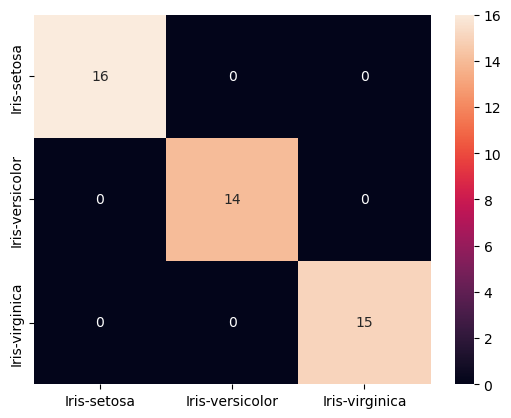

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

categories = ['Iris-setosa','Iris-versicolor','Iris-virginica']
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True,xticklabels=categories,yticklabels=categories)

Berikut ini interpretasi singkat dari elemen-elemen matriks dalam konteks klasifikasi bunga Iris:

1. Elemen Diagonal (TP): Ini adalah prediksi yang benar, di mana model secara akurat mengidentifikasi spesies bunga iris.

1. Elemen di luar diagonal (FP dan FN): Ini mewakili kesalahan yang dibuat oleh model dalam memprediksi spesies iris.

Mengevaluasi metrik kinerja seperti presisi, recall, dan skor F1 dapat diturunkan dari Confusion Matrix untuk memberikan pemahaman yang lebih rinci tentang seberapa baik kinerja model dalam hal False Positive dan False Negative, yang merupakan pertimbangan penting dalam tugas klasifikasi.

# Post-Test

1. Eksplorasi penerapan jaringan saraf, seperti multi-layer perceptron (MLP), dalam klasifikasi bunga Iris. Bagaimana jaringan saraf dibandingkan dengan algoritma klasifikasi tradisional dalam menangani kompleksitas dataset Iris?

1. Diskusikan pertimbangan desain untuk arsitektur jaringan syaraf tiruan ketika diterapkan pada klasifikasi bunga Iris. Bagaimana faktor-faktor seperti jumlah hidden layer dan neuron (node) berdampak pada kinerja model jaringan syaraf tiruan?

1. Diskusikan tren masa depan bagaimana teknologi atau metodologi yang muncul dapat memengaruhi cara para peneliti mendekati dan memecahkan masalah klasifikasi yang mirip dengan dataset Iris?